#### Problem statement

    This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv("./data/stud.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Data Shape

In [4]:
df.shape

(1000, 8)

#### Data Information


    gender : sex of students -> (Male/female)
    race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
    parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
    lunch : having lunch before test (standard or free/reduced)
    test preparation course : complete or not complete before test
    math score
    reading score
    writing score



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Data Check To Perform

    Check Missing values
    Check Duplicates
    Check data type
    Check the number of unique values of each column
    Check statistics of data set
    Check various categories present in the different categorical column


Check Missing values

In [7]:
# df.isna().any()
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### Check Duplicates

In [8]:
df.duplicated().sum()

np.int64(0)

#### Check Data Types

df.info()

#### Check the number of unique values of each column

In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

#### Check statistics of data set

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


- Standard Deviation are very close to each other 15.16308, 14.600192, 15.195657
- All means are very close to each other 14, 14, 15
- Minimum score for math is 0, for writing is higher=10, and for reading is much more higher=15

#### Check various categories present in the different categorical column

In [11]:
numerical_columns = [column for column in df.columns if df[column].dtype != "O"]
categorical_columns = [column for column in df.columns if df[column].dtype == "O"]

In [12]:
print(f"we have {len(numerical_columns)} numerical columns: {numerical_columns}")
print(f"we have {len(categorical_columns)} categorical columns: {categorical_columns} ")

we have 3 numerical columns: ['math score', 'reading score', 'writing score']
we have 5 categorical columns: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'] 


In [13]:
categorical_columns

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [14]:
for categorical_column in categorical_columns:
    print(categorical_column,"=>",df[categorical_column].unique())

gender => ['female' 'male']
race/ethnicity => ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education => ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch => ['standard' 'free/reduced']
test preparation course => ['none' 'completed']


In [15]:
for column in categorical_columns:
    print(f"Categories in {column} : {df[column].unique()}")

Categories in gender : ['female' 'male']
Categories in race/ethnicity : ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch : ['standard' 'free/reduced']
Categories in test preparation course : ['none' 'completed']


#### Adding Total Score and Average Score

In [16]:
df["total score"] = df["math score"] + df["reading score"] + df["writing score"]
df["average"] = df["total score"] /3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [17]:
full_marks_reading = df[df["reading score"]==100]["reading score"].count()
full_marks_writing = df[df["writing score"]==100]["writing score"].count()
full_marks_maths = df[df["math score"]==100]["math score"].count()

print(f"Number of students with full marks in Math {full_marks_maths}")
print(f"Number of students with full marks in Writing {full_marks_writing}")
print(f"Number of students with full marks in Reading {full_marks_reading}")

Number of students with full marks in Math 7
Number of students with full marks in Writing 14
Number of students with full marks in Reading 17


In [18]:
reading_less_20 = df[df["reading score"] <=20]["average"].count()
writing_less_20 = df[df["writing score"] <=20]["writing score"].count()
maths_less_20 = df[df["math score"] <=20]["writing score"].count()


print(f"Number of students with less than 20 marks in Math {maths_less_20}")
print(f"Number of students with less than 20 marks in Writing {writing_less_20}")
print(f"Number of students with less than 20 marks in Reading {reading_less_20}")

Number of students with less than 20 marks in Math 4
Number of students with less than 20 marks in Writing 3
Number of students with less than 20 marks in Reading 1


 - students have performed the worst in maths
 - and best in reading section

#### Exploring Data (Visualization
 - KDE
 - Histogram

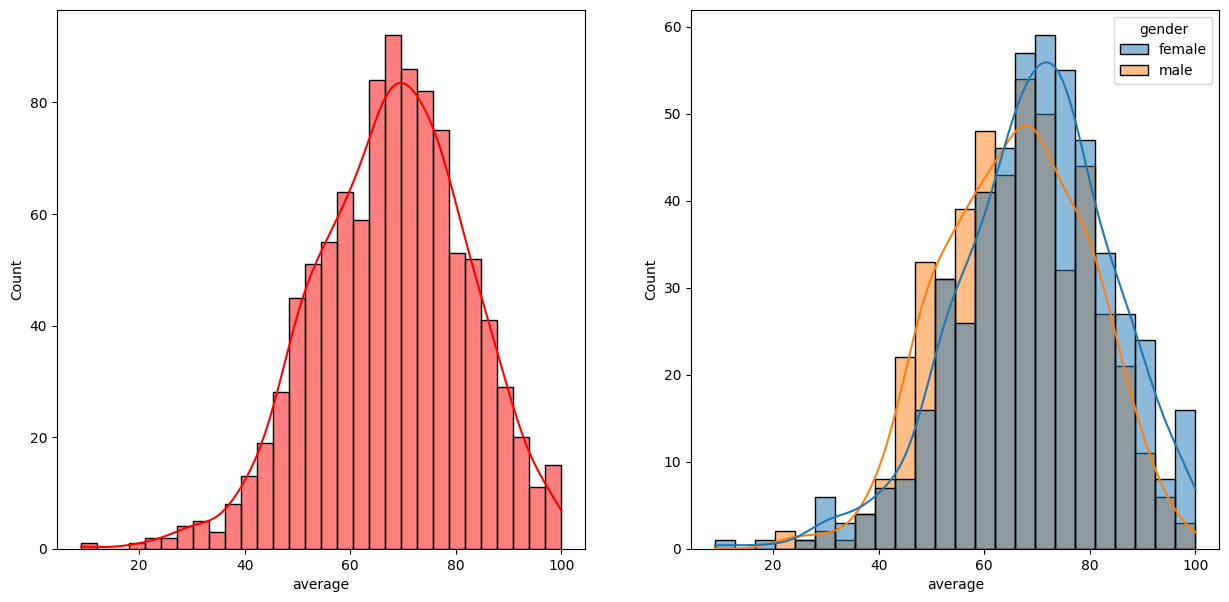

In [19]:
fig, axes = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color="red")
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue="gender")
plt.show()

- Female Students tend to perform well than the male students

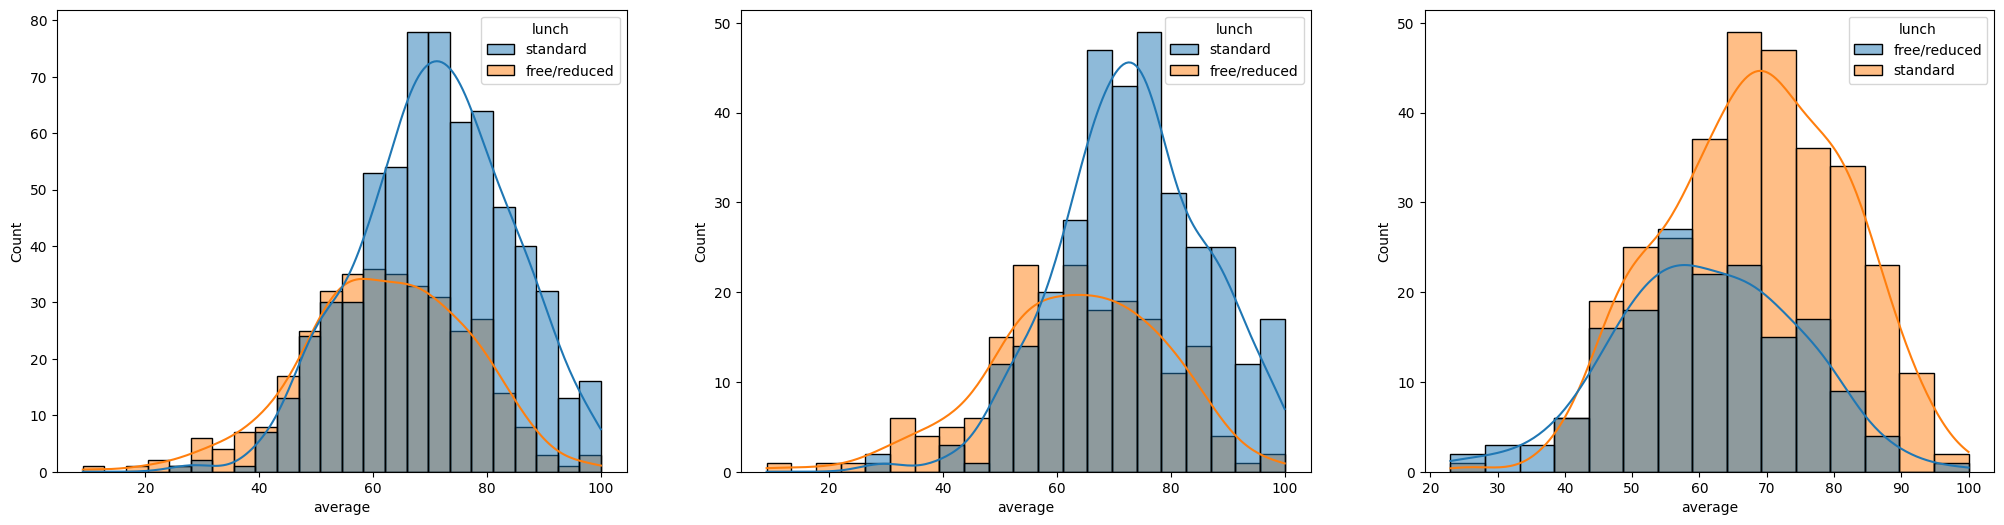

In [20]:
fig, axes = plt.subplots(1,3,figsize=(25,6))

sns.histplot(data=df,x="average", kde=True, hue="lunch" , ax=axes[0])

sns.histplot(data=df[df["gender"]=="female"], x="average", hue="lunch", kde=True, ax=axes[1])

sns.histplot(data=df[df["gender"]=="male"], x="average", hue="lunch", kde=True, ax=axes[2])
plt.show()
             

- students having lunch are tend to score more than the students with no lunch

In [21]:
df[df["lunch"]=="standard"].describe()

,math score,reading score,writing score,total score,average
count,645.000000,645.000000,645.000000,645.000000,645.000000
mean,70.034109,71.654264,70.823256,212.511628,70.837209
std,13.653501,13.830602,14.339487,39.559515,13.186505
min,19.000000,26.000000,22.000000,78.000000,26.000000
25%,61.000000,63.000000,62.000000,187.000000,62.333333
50%,69.000000,72.000000,72.000000,214.000000,71.333333
75%,80.000000,82.000000,81.000000,239.000000,79.666667
max,100.000000,100.000000,100.000000,300.000000,100.000000


- Standard Lunch helps to perform well in exam for both girls and boys

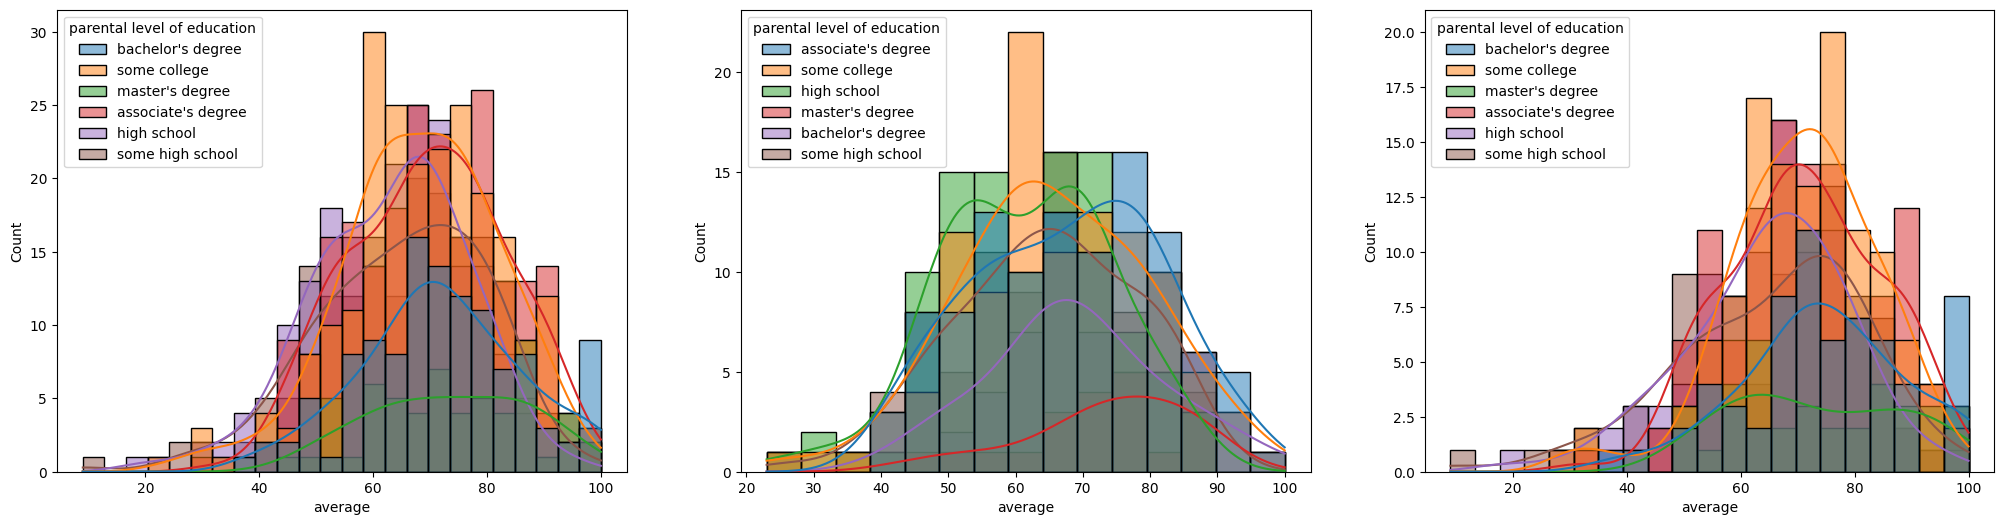

In [22]:
fig, ax = plt.subplots(1,3,figsize=(25,6))

sns.histplot(data=df, x="average", kde=True, hue="parental level of education", ax=ax[0])

sns.histplot(data=df[df["gender"]=="male"], x="average", hue="parental level of education", kde=True, ax=ax[1])

sns.histplot(data=df[df["gender"]=="female"], x="average", hue="parental level of education", kde=True, ax=ax[2])

plt.show()

Generally the parents education level dont help students to score more
In case of male students, associate and some college degree holder parent's child tend to perform well in exam


From

In [23]:
# Calculate the mean score for each parental education level
parental_avg_score = df.groupby('parental level of education')['average'].mean()
print(parental_avg_score)


parental level of education
associate's degree    69.569069
bachelor's degree     71.923729
high school           63.096939
master's degree       73.598870
some college          68.476401
some high school      65.108007
Name: average, dtype: float64


C:\Users\prana\AppData\Local\Temp\ipykernel_19832\418959776.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=parental_avg_score.index, y=parental_avg_score.values, palette='viridis')


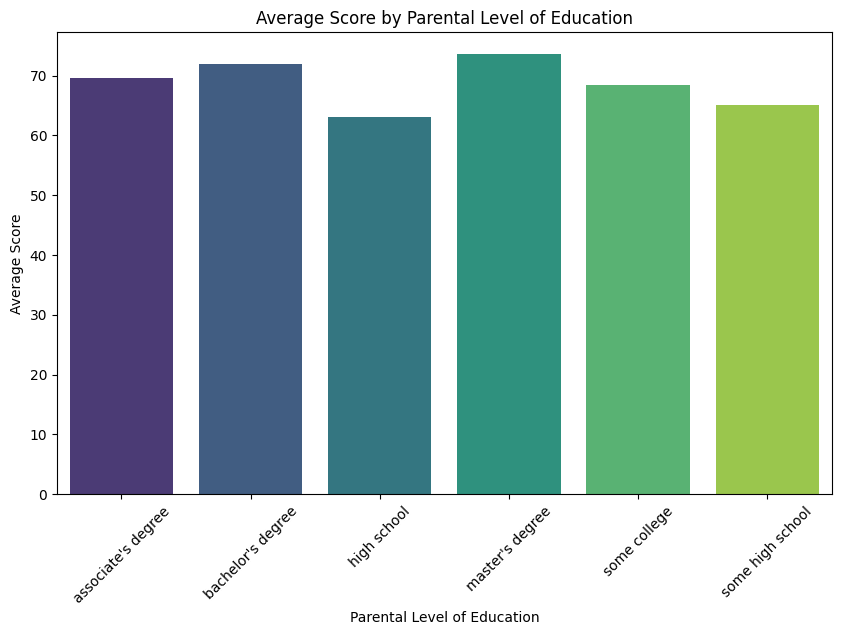

In [24]:
# Bar plot to visualize the mean score for each parental level of education
plt.figure(figsize=(10, 6))
sns.barplot(x=parental_avg_score.index, y=parental_avg_score.values, palette='viridis')
plt.title('Average Score by Parental Level of Education')
plt.xlabel('Parental Level of Education')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.show()


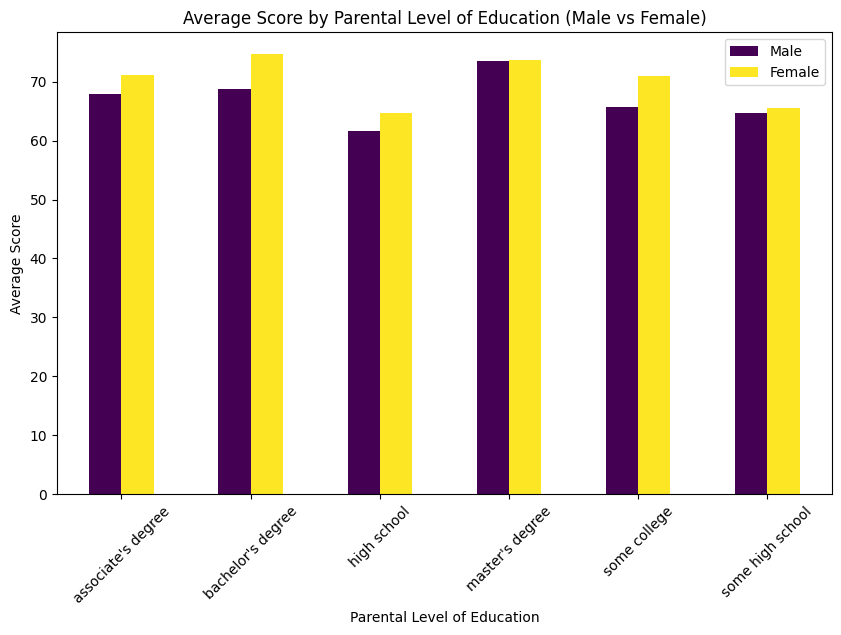

In [25]:
# Calculate the mean score by parental education level for male and female students separately
male_avg_score = df[df["gender"] == "male"].groupby('parental level of education')['average'].mean()
female_avg_score = df[df["gender"] == "female"].groupby('parental level of education')['average'].mean()

# Combine the two series for easier plotting
avg_score_comparison = pd.DataFrame({
    'Male': male_avg_score,
    'Female': female_avg_score
}).fillna(0)  # To handle missing data if any group is absent

# Plot
avg_score_comparison.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Average Score by Parental Level of Education (Male vs Female)')
plt.xlabel('Parental Level of Education')
plt.ylabel('Average Score')
plt.xticks(rotation=45)

plt.show()


From above observartion, child of Parent having master's degree and bachelors tends to have good marks than other,
but the difference between their marks is not much more significant,

Child of Parent with high school degree has lower marks than the other

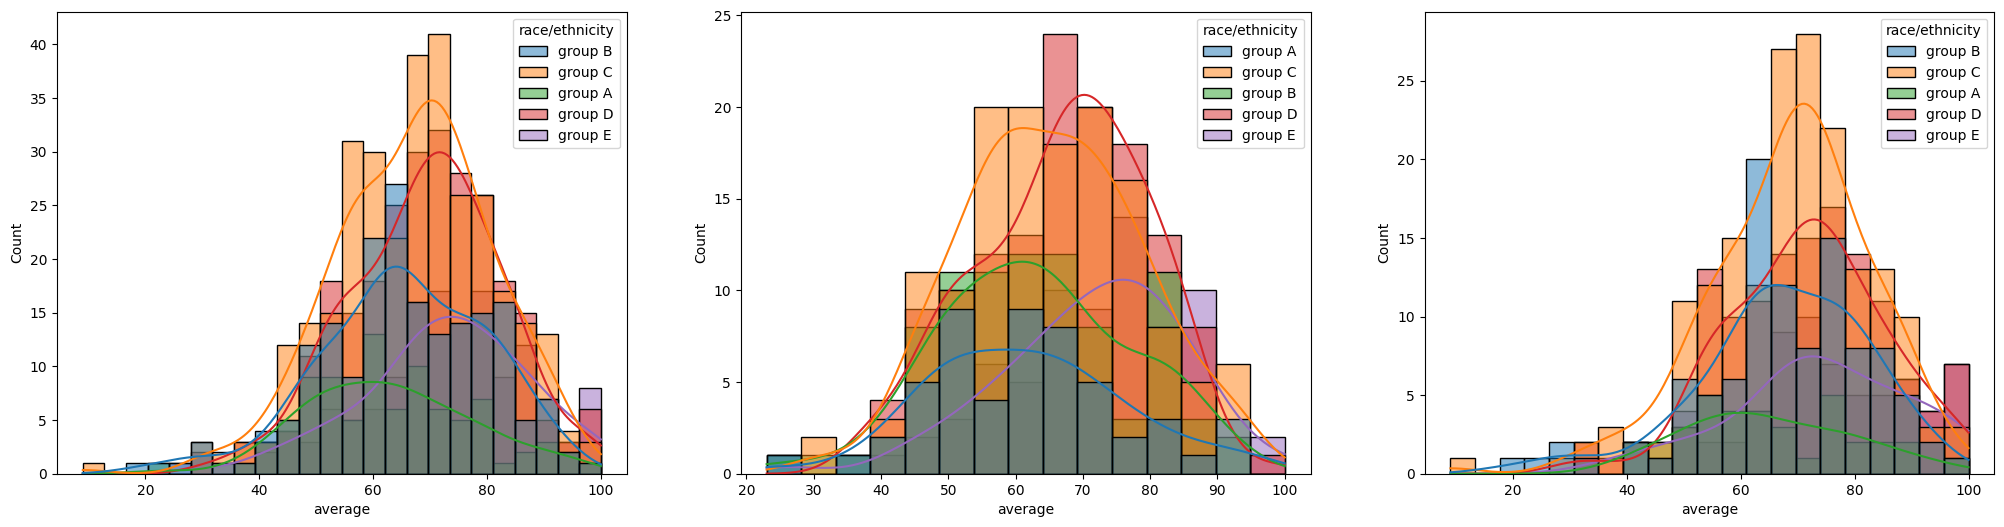

In [26]:
fig, ax = plt.subplots(1,3,figsize=(25,6))

sns.histplot(data=df, x="average", hue="race/ethnicity", kde=True, ax=ax[0])

sns.histplot(data=df[df["gender"] == "male"], x="average",hue="race/ethnicity", kde=True, ax=ax[1] )

sns.histplot(data=df[df["gender"] == "female"], x="average",hue="race/ethnicity", kde=True, ax=ax[2])
plt.show()

<Axes: xlabel='race/ethnicity'>

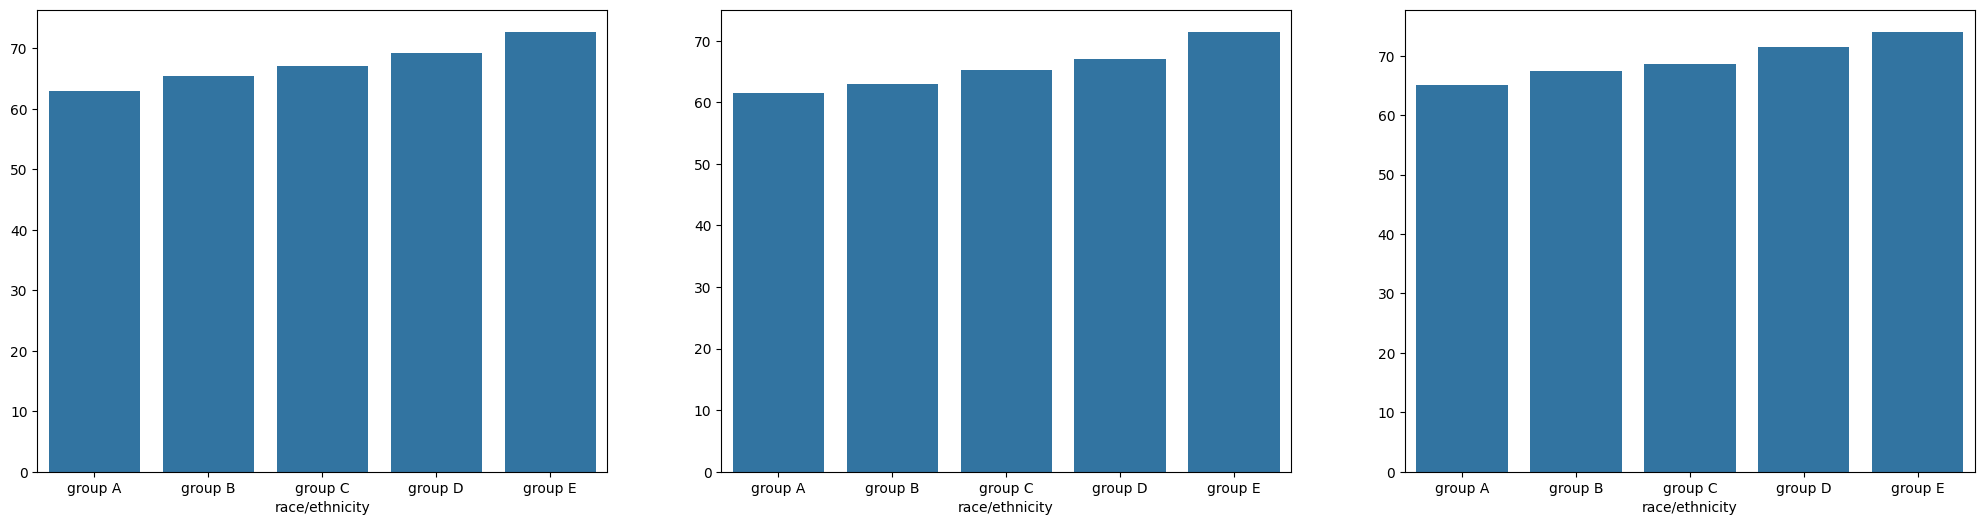

In [27]:

fig, ax = plt.subplots(1,3, figsize=(25,6))

avg_score = df.groupby("race/ethnicity")["average"].mean()
male_avg_score = df[df["gender"]=="male"].groupby("race/ethnicity")["average"].mean()
female_avg_score = df[df["gender"]=="female"].groupby("race/ethnicity")["average"].mean()

sns.barplot(x=avg_score.index, y=avg_score.values, ax=ax[0])
sns.barplot(x=male_avg_score.index, y=male_avg_score.values, ax=ax[1])
sns.barplot(x=female_avg_score.index, y=female_avg_score.values, ax=ax[2])


Group A and Group B tend to perform poorly in exam

#### Maximum score of students in all three subjects

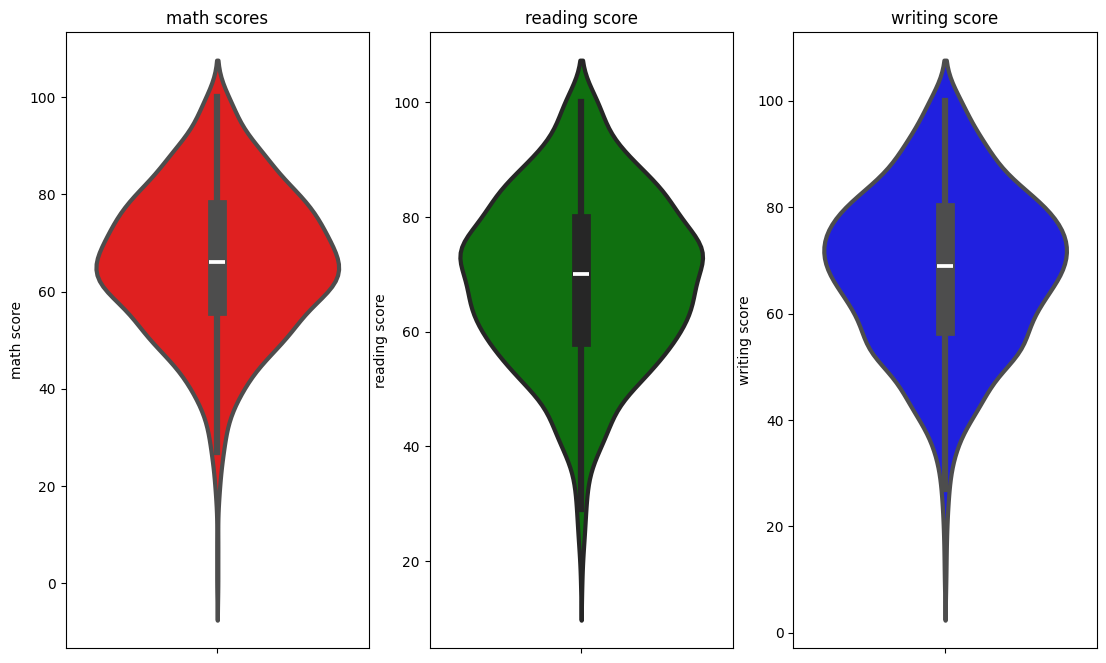

In [28]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title("math scores")
sns.violinplot(y="math score", data=df, color="red", linewidth=3)
plt.subplot(1,4,2)
plt.title("reading score")
sns.violinplot(y="reading score", data=df, color='green', linewidth=3)
plt.subplot(1,4,3)
plt.title("writing score")
sns.violinplot(y="writing score", data=df, color="blue", linewidth=3)
plt.show()

- From above three graphs, it is clearlu visible that math scores lies in between 60 to 80,
- for reading and writing it is between 50 to 80

Multivariate Analysis using Pieplot

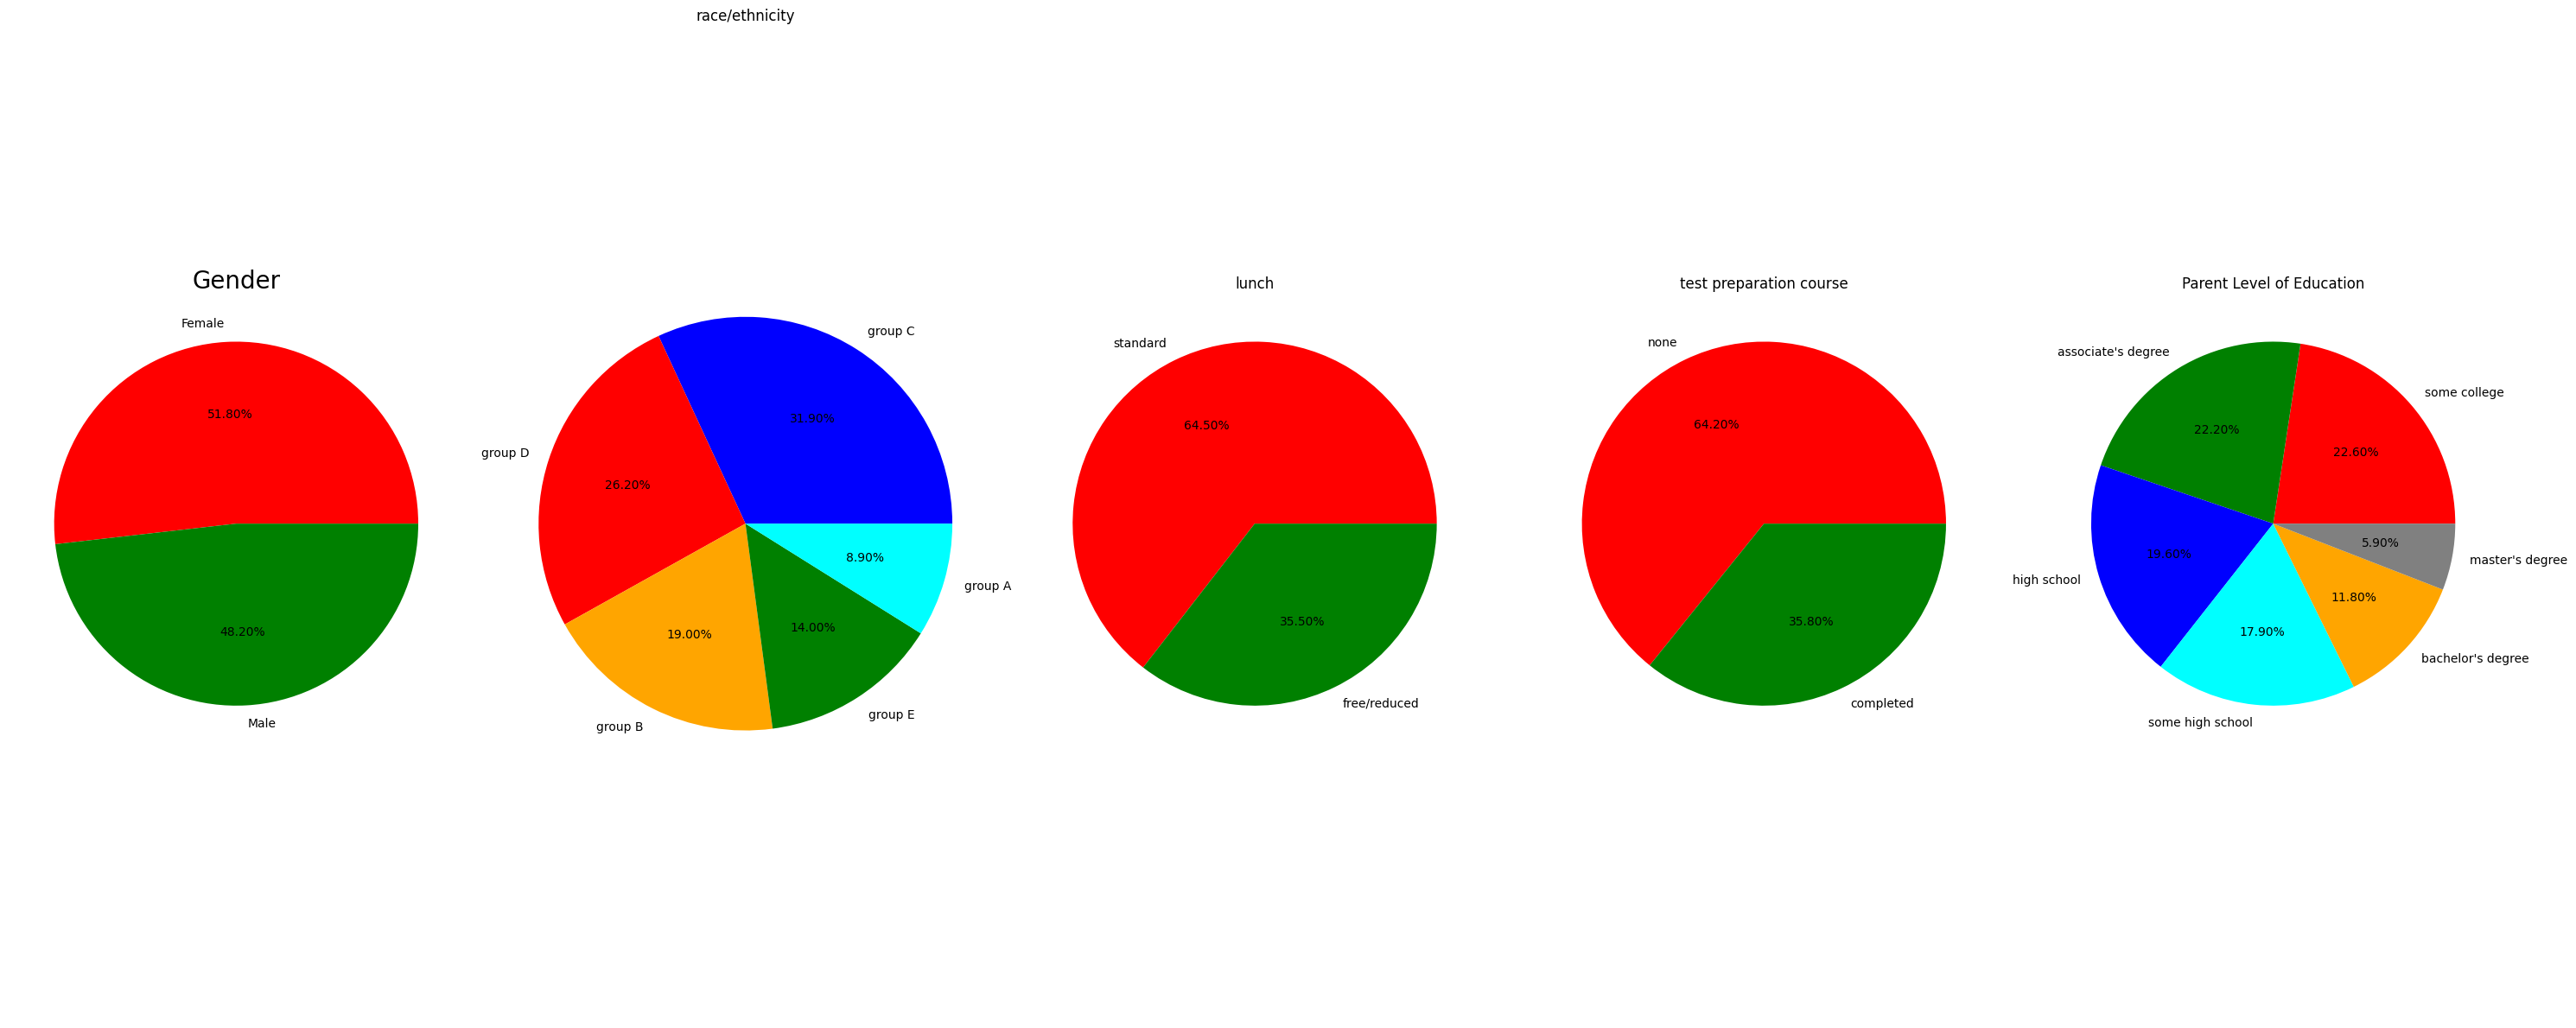

In [29]:
plt.rcParams["figure.figsize"] = (30,12)

plt.subplot(1,5,1)
size = df["gender"].value_counts()
labels = "Female", "Male"
color = ["red", "green"]

plt.pie(size, colors = color, labels=labels, autopct="%.2f%%")
plt.title("Gender", fontsize=20)
plt.axis("off")

plt.subplot(1,5,2)
sizes = df["race/ethnicity"].value_counts()
labels = sizes.index
color = ['blue', 'red', 'orange', 'green','cyan']
plt.pie(sizes, labels=labels, colors=color, autopct="%.2f%%")
plt.title("race/ethnicity")
plt.axis("equal")

plt.subplot(1,5,3)
sizes = df["lunch"].value_counts()
labels= sizes.index
color= ["red", "green"]
plt.title("lunch")
plt.pie(sizes, labels=labels, colors=color, autopct="%.2f%%")


plt.subplot(1,5,4)
sizes = df["test preparation course"].value_counts()
labels= sizes.index
color= ["red", "green"]
plt.title("test preparation course")
plt.pie(sizes, labels=labels, colors=color, autopct="%.2f%%")

plt.subplot(1,5,5)
size = df['parental level of education'].value_counts()
labels = size.index
color = ['red', 'green', 'blue', 'cyan','orange','grey']
plt.pie(size, labels=labels, colors=color, autopct="%.2f%%")
plt.title("Parent Level of Education")


plt.tight_layout()
plt.grid()
plt.show()



In [30]:
df.gender.describe()

count       1000
unique         2
top       female
freq         518
Name: gender, dtype: object

- Number of Male and Female Studens are almost equal
- Number of Students are greatest in Group C
- Number of Students who have standard lunch are greater
- Number of Students who have not enrolled in any test preparation course is greater
- Number of studnts whose parental education is "Some College" is greater followed by "Associate's Degree"

Feature Wise Visualization

GENDER COLUMN

Univariate Analysis

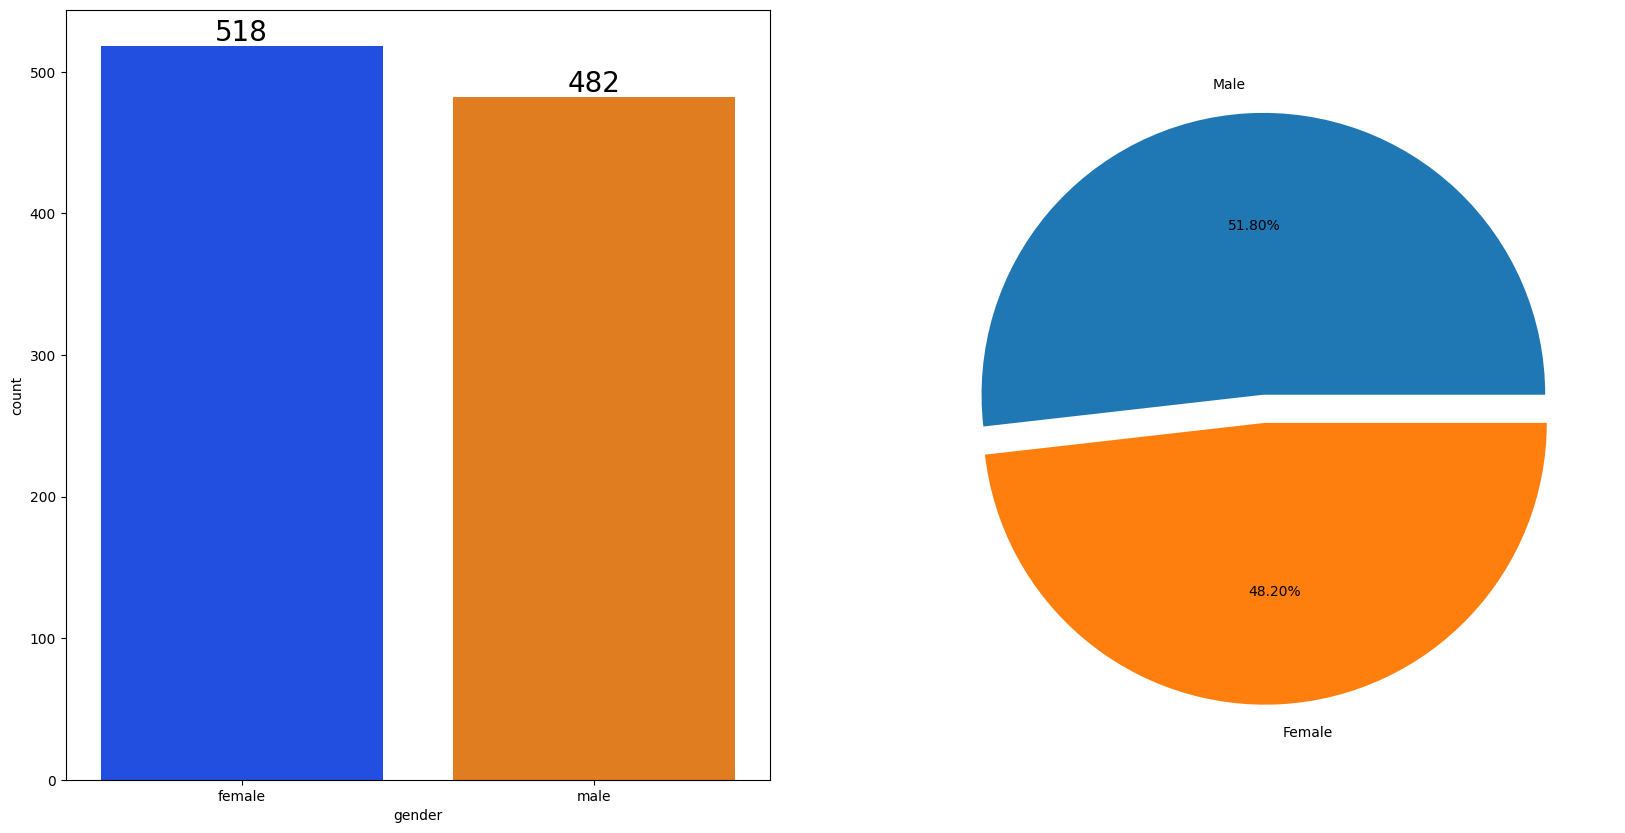

In [31]:
fig, ax = plt.subplots(1,2, figsize=(20,10))
sns.countplot(x=df["gender"], data=df, palette="bright",hue="gender", ax=ax[0])
for container in ax[0].containers:
   ax[0].bar_label(container, color="black", size=20)

plt.pie(x=df["gender"].value_counts(), labels=["Male", "Female"], explode=[0,0.1]  , autopct="%0.2f%%")
plt.show()

Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

Bivariate Analysis (Is gender has any impact on the student's performance)

In [32]:
gender_group = df.groupby("gender")["average"].mean()
gender_group

gender
female    69.569498
male      65.837483
Name: average, dtype: float64

C:\Users\prana\AppData\Local\Temp\ipykernel_19832\3792727085.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.groupby("race/ethnicity")["math score"].mean().index, y=df.groupby("race/ethnicity")["math score"].mean().values, palette="mako", ax=ax[0])
C:\Users\prana\AppData\Local\Temp\ipykernel_19832\3792727085.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.groupby("race/ethnicity")["reading score"].mean().index, y=df.groupby("race/ethnicity")["reading score"].mean().values,ax=ax[1], palette="flare")
C:\Users\prana\AppData\Local\Temp\ipykernel_19832\3792727085.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assi

<Axes: xlabel='race/ethnicity'>

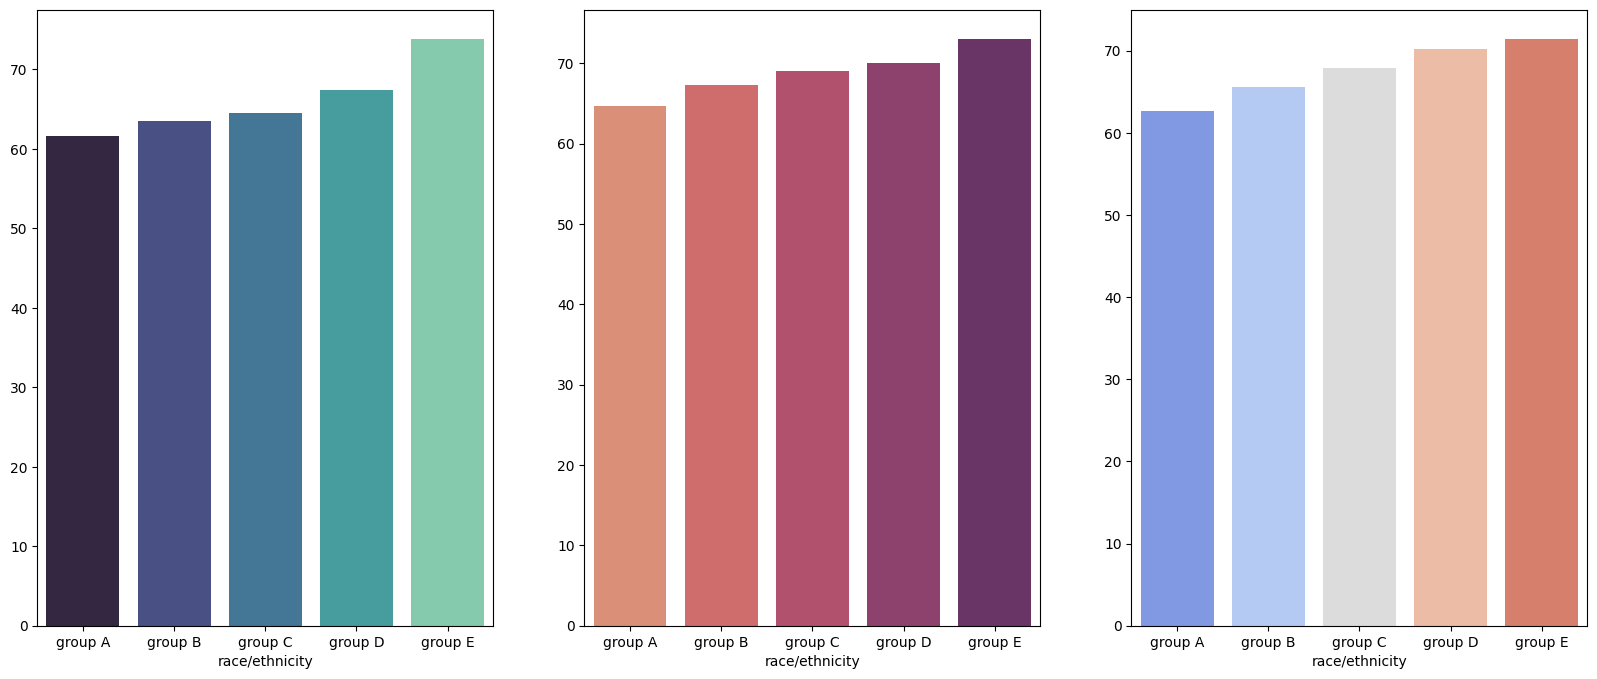

In [33]:
fig, ax = plt.subplots(1,3, figsize=(20,8))
sns.barplot(x=df.groupby("race/ethnicity")["math score"].mean().index, y=df.groupby("race/ethnicity")["math score"].mean().values, palette="mako", ax=ax[0])

sns.barplot(x=df.groupby("race/ethnicity")["reading score"].mean().index, y=df.groupby("race/ethnicity")["reading score"].mean().values,ax=ax[1], palette="flare")

sns.barplot(x=df.groupby("race/ethnicity")["writing score"].mean().index,y=df.groupby("race/ethnicity")["writing score"].mean().values,ax=ax[2], palette ="coolwarm" )

- Group E students have score the highest marks
- Group A students have score the lowest marks

Parent Level of Education Column

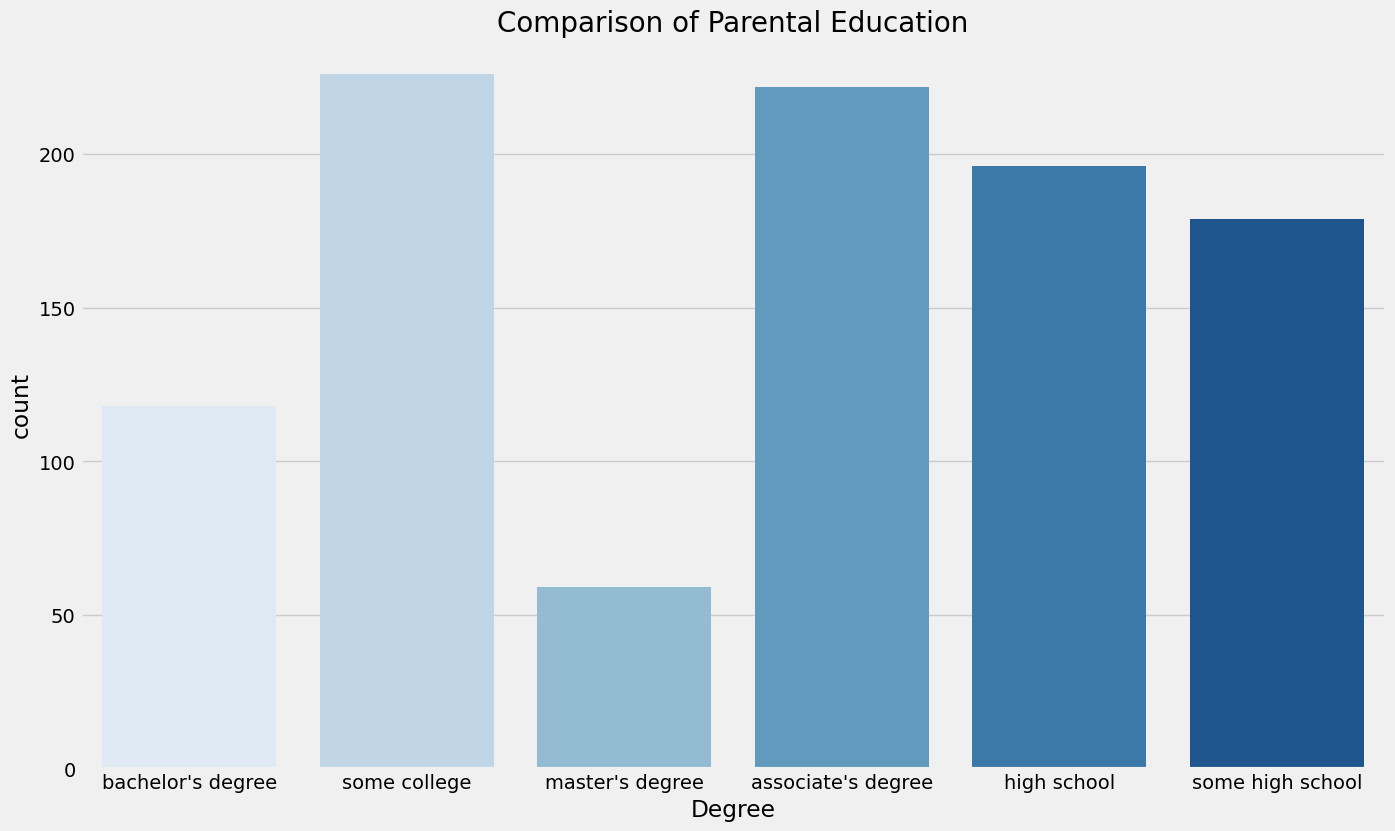

In [34]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use("fivethirtyeight")
sns.countplot(data=df, x="parental level of education", palette="Blues", hue="parental level of education")
plt.title("Comparison of Parental Education", fontweight=30, fontsize=20)
plt.xlabel("Degree")
plt.ylabel("count")
plt.show()

There are more children whose parent has **Some College Degree**

Bivariate Analysis (Does it affect on students performance)

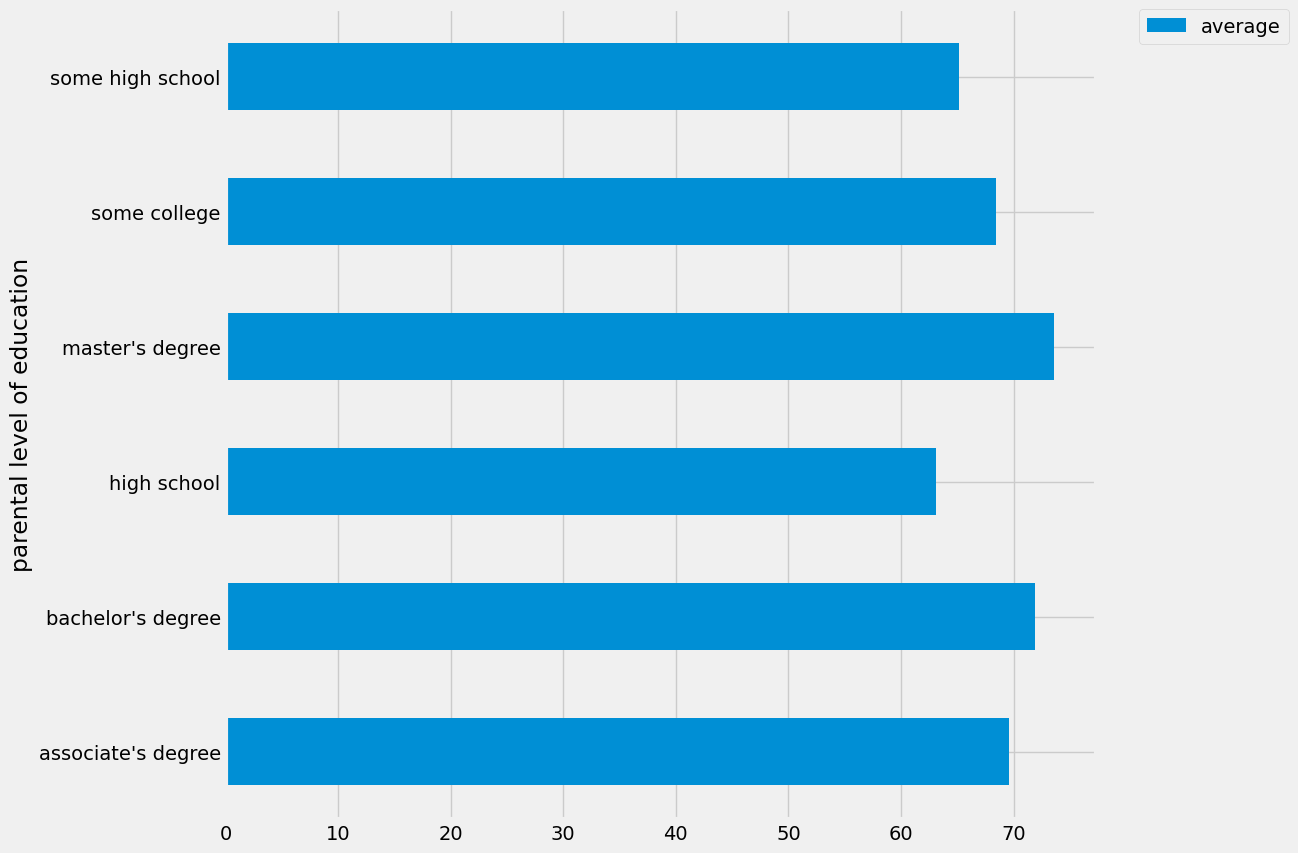

In [35]:
df.groupby("parental level of education")["average"].mean().plot(kind="barh", figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
plt.show()

The score of the students whose parents possess master and bachelor level education are higher

#### LUNCH COLUMN

Univariate Analysis

C:\Users\prana\AppData\Local\Temp\ipykernel_19832\3526561195.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df["lunch"], palette="PuBu")


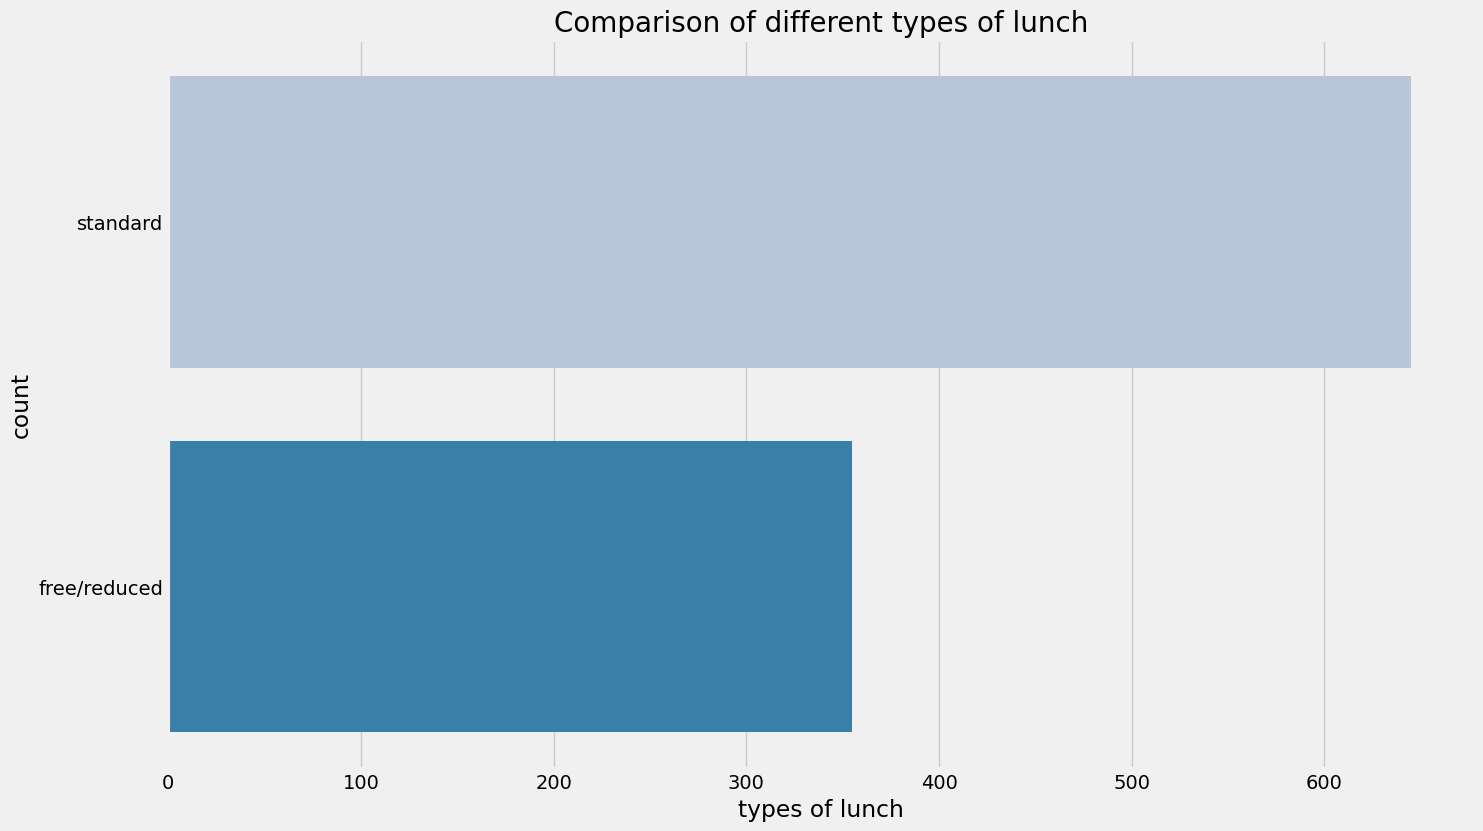

In [36]:
plt.rcParams["figure.figsize"] = (15,9)
# plt.style.use("seaborn-talk")
sns.countplot(df["lunch"], palette="PuBu")
plt.title("Comparison of different types of lunch", fontweight=30, fontsize=20)
plt.xlabel("types of lunch")
plt.ylabel("count")
plt.show()

Students being served Standard lunch was more than free lunch

Does lunch type has any impact on students performance

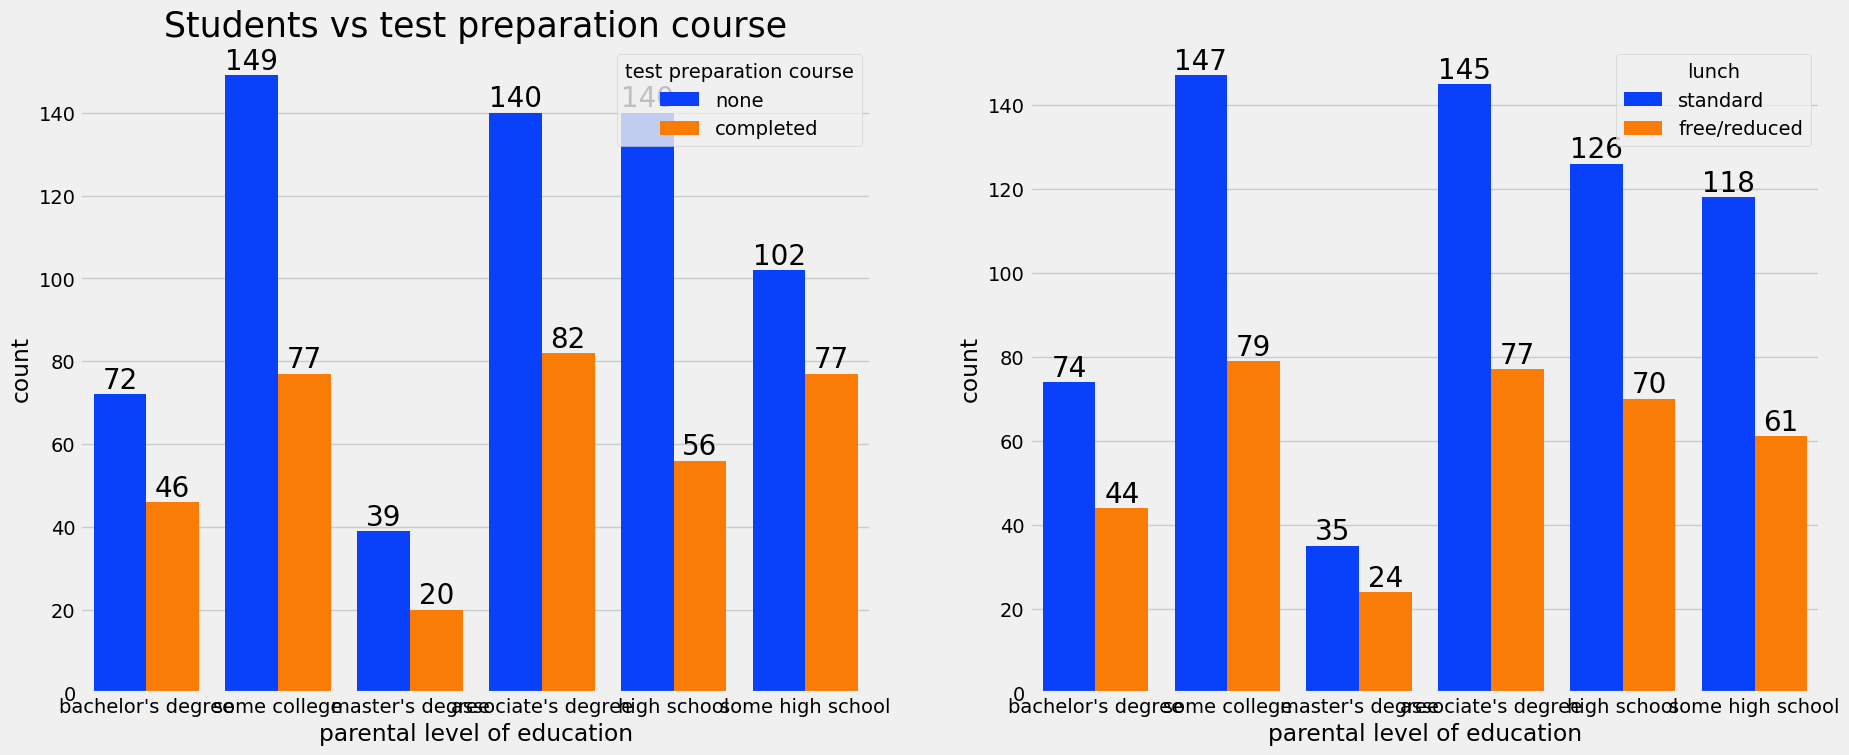

In [37]:
f, ax = plt.subplots(1,2, figsize=(20,8))
sns.countplot(x=df["parental level of education"], data=df, palette="bright", hue="test preparation course", saturation=0.95, ax=ax[0])
ax[0].set_title("Students vs test preparation course", color="black", size=25)
for container in ax[0].containers:
    ax[0].bar_label(container, color="black", size=20)

sns.countplot(x=df["parental level of education"], data=df, palette="bright", hue="lunch", saturation=0.95, ax=ax[1])    
for container in ax[1].containers:
    ax[1].bar_label(container, color="black", size=20)

Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### Test Preparation Course Column

<Axes: xlabel='lunch', ylabel='writing score'>

<Figure size 1200x600 with 0 Axes>

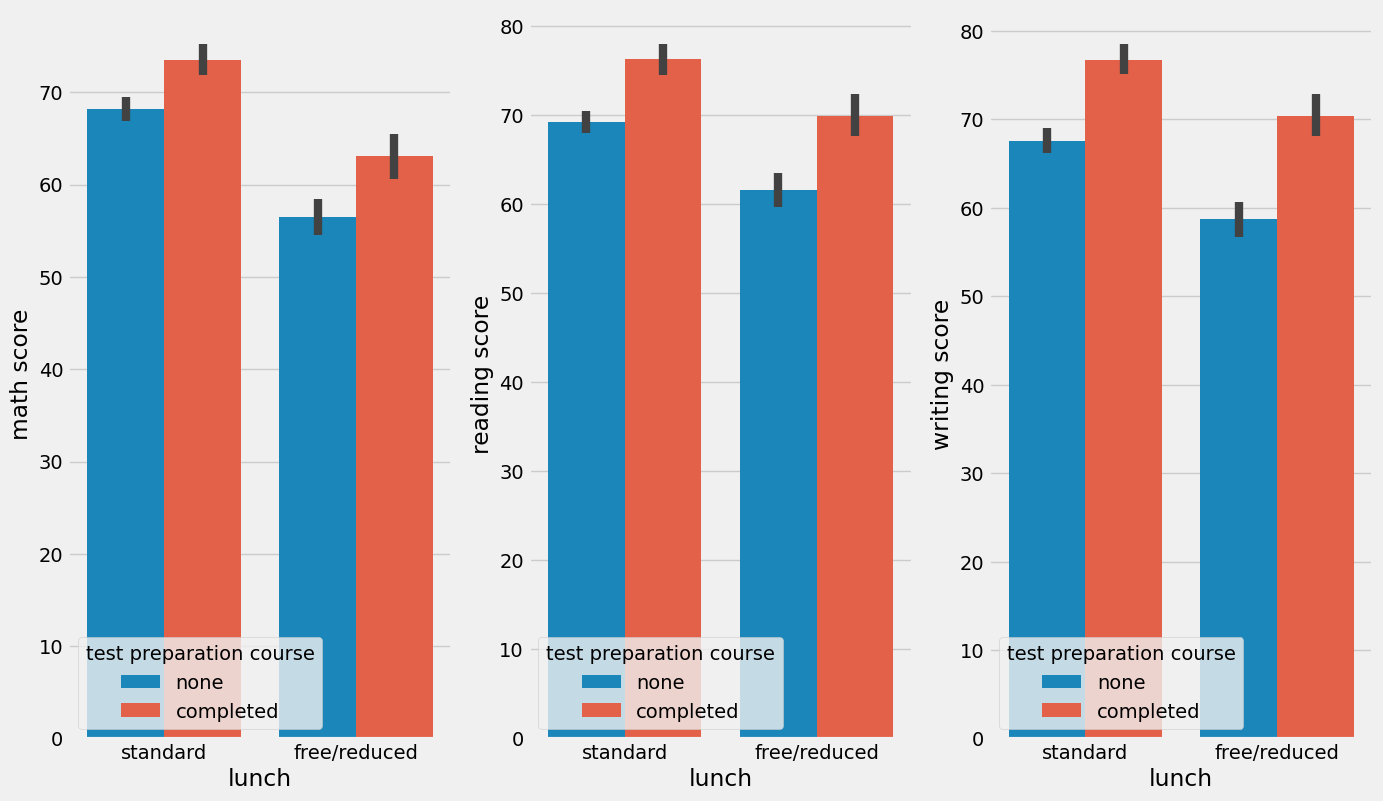

In [38]:
plt.figure(figsize=(12,6))
fig, ax = plt.subplots(1,3)
sns.barplot(x=df["lunch"], y=df["math score"], hue=df["test preparation course"], ax=ax[0])

sns.barplot(x=df["lunch"], y=df["reading score"], hue=df["test preparation course"], ax=ax[1])

sns.barplot(x=df["lunch"], y=df["writing score"], hue=df["test preparation course"], ax=ax[2])


Students who have completed the Test Preparation Course have scores higher in all three categories than those who haven't taken the course

#### Checking Outliers

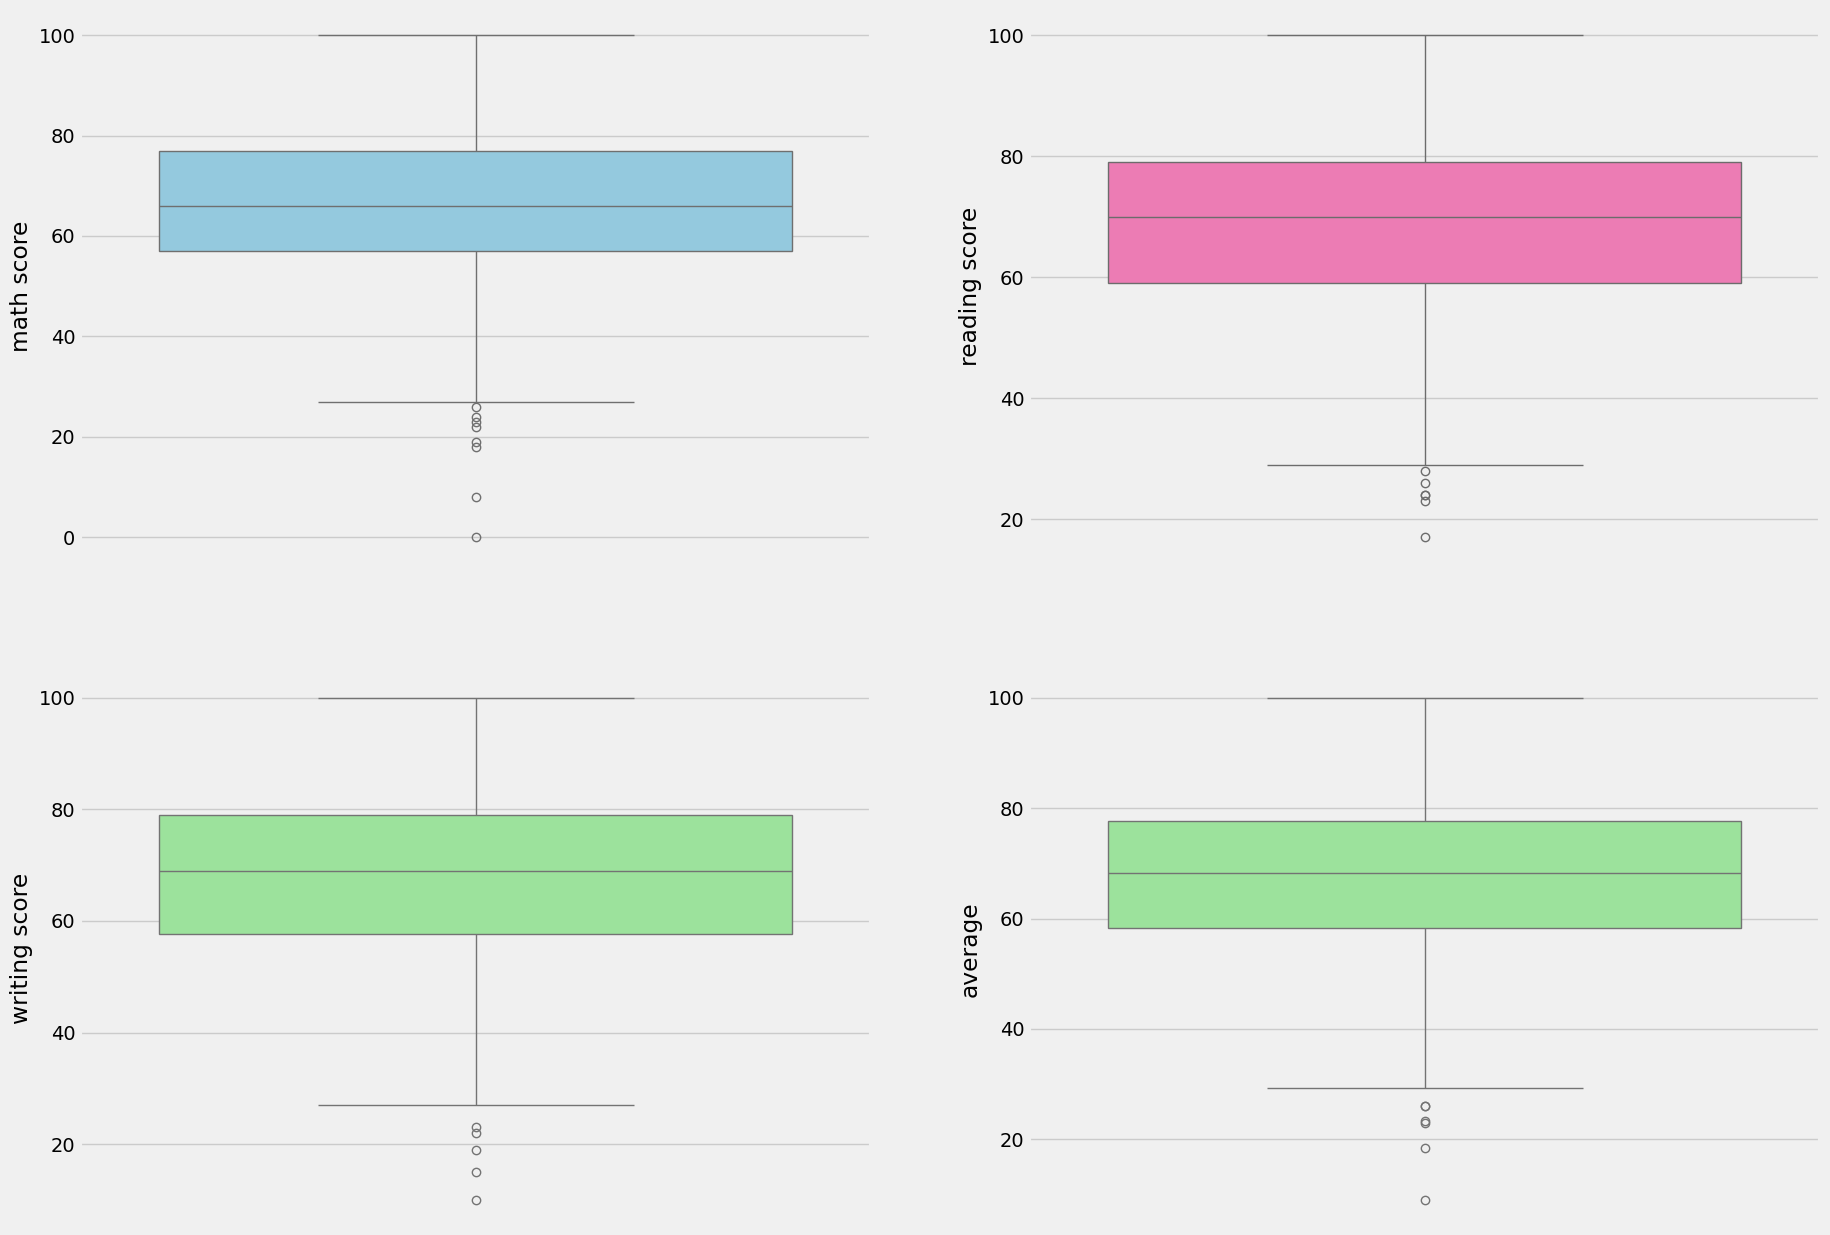

In [39]:
fig,ax = plt.subplots(2,2, figsize=(20,15))
# as it is using 2,2 => it is 2d
#  access it as ax[0][0]
sns.boxplot(df["math score"], color="skyblue", ax=ax[0][0])
sns.boxplot(df["reading score"], color="hotpink", ax=ax[0][1])
sns.boxplot(df["writing score"], color="lightgreen", ax=ax[1][0])
sns.boxplot(df["average"], color="lightgreen", ax=ax[1][1])

plt.show()

#### Multivariate Analysis

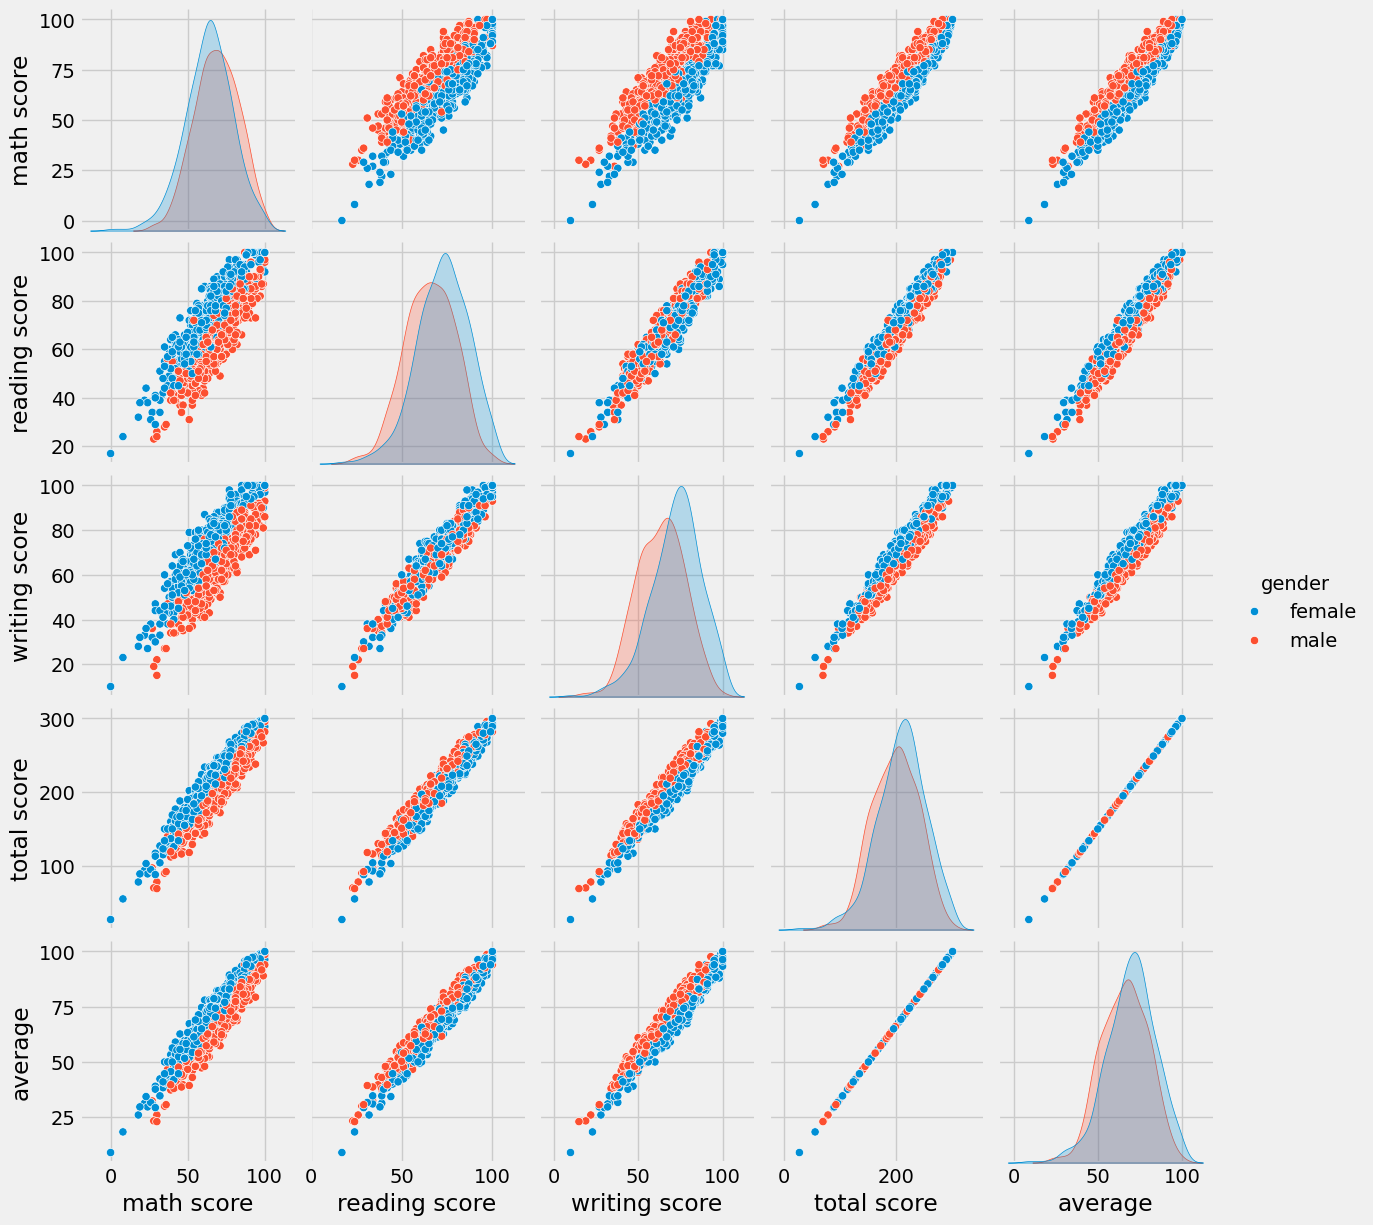

In [40]:
sns.pairplot(df, hue="gender")
plt.show()

#### All the scores increase linearly with each other

- Student's Performance is related with lunch, race, parents level education
- Females lead in pass percentage and also are top scorers
- Student's Performance is not much related with the test preparation course 
- Finishing preparation course is benefitial

In [42]:
# if we do not use index=False, then it will add new column for index
df.to_csv("data/cleaned.csv", index=False)